In [34]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_wine
from ucimlrepo import fetch_ucirepo
import torch
import sys
import openml
from tabpfn import TabPFNClassifier
import xgboost as xgb
sys.path.append('..')
from idistill.whitebox_figs import FIGSRegressorCV, FIGSRegressor, FIGSClassifier


In [40]:
d = fetch_ucirepo(id=697)
X = d.data.features
y = d.data.targets

In [41]:
y = y.Target.map({'Dropout':0,'Graduate':1, 'Enrolled':2})
y

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((2964, 36), (1460, 36))

In [5]:
# Initialize a classifier
clf = TabPFNClassifier(ignore_pretraining_limits=True)
clf.fit(X_train, y_train)

# # Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

Accuracy 0.7705479452054794


In [6]:
y_train_preds = clf.predict_proba(X_train)

In [7]:
figs = FIGSRegressor(max_depth = 3)
x = xgb.XGBRegressor(max_depth=3, booster='gbtree')
figs.fit(X_train, y_train_preds)
x.fit(X_train, y_train_preds)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [8]:
accuracy_score(y_test, np.argmax(figs.predict(X_test), axis = 1))

0.739041095890411

In [9]:
accuracy_score(predictions, np.argmax(figs.predict(X_test), axis = 1))

0.8856164383561644

In [10]:
accuracy_score(y_test, np.argmax(x.predict(X_test), axis = 1))

0.7657534246575343

In [11]:
accuracy_score(predictions, np.argmax(x.predict(X_test), axis = 1))

0.9376712328767123

In [12]:
num_rules = 0
trees = x.get_booster().get_dump(with_stats=True)

for tree in trees:
    num_rules += len([line for line in tree.splitlines() if 'leaf=' not in line])

print(num_rules, figs.complexity_/num_rules)

0:[Curricular units 2nd sem (approved)<4] yes=1,no=2,missing=1,gain=245.136871,cover=2964
	1:[Curricular units 2nd sem (approved)<2] yes=3,no=4,missing=3,gain=21.8728676,cover=967
		3:[Curricular units 1st sem (enrolled)<1] yes=7,no=8,missing=7,gain=26.167511,cover=656
			7:leaf=-0.0255141184,cover=124
			8:leaf=0.127308235,cover=532
		4:[Tuition fees up to date<1] yes=9,no=10,missing=9,gain=12.0290947,cover=311
			9:leaf=0.12783359,cover=55
			10:leaf=-0.0256104525,cover=256
	2:[Tuition fees up to date<1] yes=5,no=6,missing=5,gain=30.3182678,cover=1997
		5:[GDP<1.90499997] yes=11,no=12,missing=11,gain=3.00956249,cover=107
			11:leaf=0.0769452006,cover=67
			12:leaf=-0.0262389947,cover=40
		6:[Curricular units 1st sem (evaluations)<10] yes=13,no=14,missing=13,gain=3.42654419,cover=1890
			13:leaf=-0.133316472,cover=1373
			14:leaf=-0.103964508,cover=517

0:[Curricular units 2nd sem (approved)<5] yes=1,no=2,missing=1,gain=313.152649,cover=2964
	1:[Curricular units 2nd sem (approved)<4] 

In [13]:
sum([tree.count('<') for tree in trees])

2055

In [14]:
len(trees)

300

In [15]:
figs.complexity_, len(figs.trees_)

(12, 5)

In [62]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Convert to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

In [63]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((381, 30), (188, 30))

In [18]:
# Initialize a classifier
clf = TabPFNClassifier(ignore_pretraining_limits=True)
clf.fit(X_train, y_train)

# # Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

Accuracy 0.973404255319149


In [19]:
y_train_preds = clf.predict_proba(X_train)

In [ ]:
c = FIGSClassifier(max_depht=3)

In [20]:
figs1 = FIGSRegressor(max_depth = 3)
x1 = xgb.XGBRegressor(max_depth=3, booster='gbtree')
figs1.fit(X_train, y_train_preds)
x1.fit(X_train, y_train_preds)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
accuracy_score(y_test, np.argmax(figs1.predict(X_test), axis = 1))

0.9627659574468085

In [22]:
accuracy_score(predictions, np.argmax(figs1.predict(X_test), axis = 1))

0.9574468085106383

In [23]:
accuracy_score(y_test, np.argmax(x1.predict(X_test), axis = 1))

0.9680851063829787

In [24]:
accuracy_score(predictions, np.argmax(x1.predict(X_test), axis = 1))

0.9627659574468085

In [25]:
num_rules = 0
tree_dump = x1.get_booster().get_dump(with_stats=True)

for tree in tree_dump:
    num_rules += len([line for line in tree.splitlines() if 'leaf=' not in line])

print(num_rules, figs.complexity_/num_rules)

1262 0.009508716323296355


In [26]:
figs.complexity_, len(figs.trees_)

(12, 5)

In [27]:
sum([tree.count('<') for tree in tree_dump])

1262

In [28]:
len(tree_dump)

200

In [29]:
len(x1.get_booster().get_dump())

200

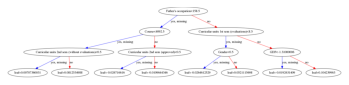

In [30]:
import matplotlib.pyplot as plt
xgb.plot_tree(x, num_trees=20)
plt.show()

In [31]:
x.get_num_boosting_rounds()

100

In [33]:
figs1

FIGSRegressor(max_depth=3)